# Naive Bayes Classifier -- SMS Classification

Goal: Train a Naive Bayes model to classify future SMS messages as either spam or ham.

Steps:

1. Convert the words ham and spam to a binary indicator variable(0/1)
2. Convert the txt to a sparse matrix of TFIDF vectors
3. Fit a Naive Bayes Classifier
4. Measure the model performace using roc_auc_score and other metrics.

In [1]:
## Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

In [2]:
## Dowload nltk
##nltk.download("stopwords")

In [3]:
df_sms = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/SMS/SMS_SPAM.csv")

In [4]:
df_sms

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [5]:
nltk.data.path

['C:\\Users\\atul8/nltk_data',
 'C:\\ProgramData\\Anaconda3\\nltk_data',
 'C:\\ProgramData\\Anaconda3\\share\\nltk_data',
 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data',
 'C:\\Users\\atul8\\AppData\\Roaming\\nltk_data',
 'C:\\nltk_data',
 'D:\\nltk_data',
 'E:\\nltk_data']

In [6]:
df_sms.type.value_counts()

ham     4827
spam     747
Name: type, dtype: int64

In [7]:
##convert the type column into numeric
### Let 1 == ham and 0 == spam
df_sms.replace("ham", 1,inplace= True)
df_sms.replace("spam", 0,inplace= True)

In [8]:
df_sms.type.value_counts()

1    4827
0     747
Name: type, dtype: int64

In [9]:
### Define X and y
X = df_sms.text
y = df_sms.type

In [10]:
print(df_sms.shape)
print(type(df_sms))

(5574, 2)
<class 'pandas.core.frame.DataFrame'>


In [11]:
print(X.shape)
print(type(X))

(5574,)
<class 'pandas.core.series.Series'>


In [12]:
print(y.shape)
print(type(y))

(5574,)
<class 'pandas.core.series.Series'>


In [13]:
# Convert a collection of raw documents(df_sms.text) to a matrix of TF-IDF features and also remove stopwords
setstop =  set(stopwords.words("english"))

In [14]:
vectorizer = TfidfVectorizer(use_idf=True,lowercase=True,strip_accents="ascii",stop_words=setstop)

In [15]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents='ascii', sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [16]:
X_sparse = vectorizer.fit_transform(df_sms.text)

In [17]:
X_sparse

<5574x8586 sparse matrix of type '<class 'numpy.float64'>'
	with 47400 stored elements in Compressed Sparse Row format>

In [18]:
print(X.shape)
print(type(X))

(5574,)
<class 'pandas.core.series.Series'>


In [19]:
print(X_sparse.shape)
print(type(X_sparse))

(5574, 8586)
<class 'scipy.sparse.csr.csr_matrix'>


#### Lets verify TF and IDF

###### TF (Term Frequecy)
**TF(t)** = No of times term t appear in document / Total No of terms in the document

**IDF(t)** = log_e(Total No of documents / Number of documents with term t in it)

**TDIDF Score** = TF(t) * IDF(t)


In [20]:
### Lets select the 1st sms from dataset
sms1 = df_sms.text[0]
sms1

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [21]:
### Now split the sms
split_sms1 = sms1.split()
print(split_sms1)

['Go', 'until', 'jurong', 'point,', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'there', 'got', 'amore', 'wat...']


In [22]:
print(type(split_sms1))

<class 'list'>


In [23]:
## Finding the Total No of terms(words) in this sms1(document)
len(split_sms1)

20

In [24]:
## Lets check how many words are stored in sparse Matrix for sms1.
X_sparse[0]

<1x8586 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

We can see that out or 20 , only **14 words** are stored in sparse matrix as a compressed Sparse raw format

In [25]:
### Lets print all the 14 words positions(Row would=0 and need to find columns = ?) in Sparse Matrix
print(X_sparse[0])

  (0, 8218)	0.1936754385697072
  (0, 1074)	0.34661850736522926
  (0, 3580)	0.16250347021789968
  (0, 2038)	0.29282687644410044
  (0, 1744)	0.33088546389448276
  (0, 4442)	0.29282687644410044
  (0, 8428)	0.23446497404204306
  (0, 3620)	0.19147848622350874
  (0, 1746)	0.29282687644410044
  (0, 1301)	0.25926284833436075
  (0, 2316)	0.2684353143416924
  (0, 5877)	0.27111240744926074
  (0, 4316)	0.34661850736522926
  (0, 3536)	0.15700708175427927


We can see TFIDF score of all the 14 words in above table. Same we can finf the TFIDF of other sms.

In [26]:
### lets find the most frequet elements in sms or sparse metrics
sparse_feature_names = vectorizer.get_feature_names()

In [27]:
print(sparse_feature_names)

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '

In [28]:
## https://www.geeksforgeeks.org/python-find-most-frequent-element-in-a-list/
### Program to find most frequent-- Naive Appraoch
### This is a brute force approach in which we make use of for loop to count the frequency of each element. 
### If the current frequency is greater than the previous frequency, update the counter and store the element.

def most_frequent(List):
    counter = 0
    num = List[0]      
    for i in List:
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num

In [29]:
most_frequent(sparse_feature_names)

'00'

In [30]:
## Program to find most frequent--  Pythonic Naive appraoch
## Make a set of the list so that the duplicate elements are deleted. 
## Then find the highest count of occurrences of each element in the set and thus, we find the maximum out of it.
# element in a list 
def most_frequent1(List): 
    return max(set(List), key = List.count) 

In [31]:
most_frequent1(sparse_feature_names)

'claypot'

In [32]:
# Program to find most frequent -- Using Counter
## Make use of Python Counter which returns count of each element in the list. 
## Thus, we simply find the most common element by using most_common() method.

from collections import Counter 
  
def most_frequent3(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0] 

In [33]:
most_frequent3(sparse_feature_names)

'00'

In [34]:
# Program to find most frequent -- Using Python dictionary
## Finding most frequent element means finding mode of the list. Hence, we use mode method from statistics.
def most_frequent4(List): 
    dict = {} 
    count, itm = 0, '' 
    for item in reversed(List): 
        dict[item] = dict.get(item, 0) + 1
        if dict[item] >= count : 
            count, itm = dict[item], item 
    return(itm) 

In [35]:
most_frequent4(sparse_feature_names)

'00'

#### Apply Naive Bayes Classifier

In [36]:
print(X_sparse.shape)
print(type(X_sparse))

(5574, 8586)
<class 'scipy.sparse.csr.csr_matrix'>


In [37]:
## Split train and test 
X_train,X_test,y_train,y_test = train_test_split(X_sparse,y,random_state = 42)

In [38]:
print(X_sparse.shape)
print(y.shape)

(5574, 8586)
(5574,)


In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4180, 8586)
(4180,)
(1394, 8586)
(1394,)


In [40]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'pandas.core.series.Series'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'pandas.core.series.Series'>


In [41]:
### Train Naive bayes classifier
classifier = naive_bayes.MultinomialNB()

In [42]:
naive_model = classifier.fit(X_train,y_train)

In [43]:
## Lets predict the output using test data
y_predict = naive_model.predict(X_test)

In [44]:
print(y_predict)

[1 1 1 ... 1 1 1]


In [45]:
y_test

3690    1
3527    1
724     1
3370    1
468     1
       ..
19      0
4758    1
668     1
218     1
4660    1
Name: type, Length: 1394, dtype: int64

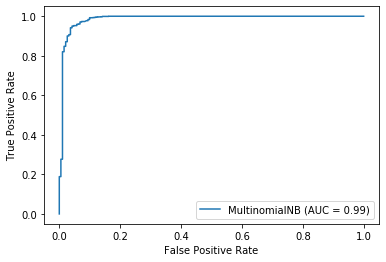

In [46]:
metrics.plot_roc_curve(naive_model,X_test,y_test)

In [47]:
### Lets calculate probablity based predicted value
y_predict_prob = naive_model.predict_proba(X_test)

In [48]:
print(y_predict_prob)

[[0.00270358 0.99729642]
 [0.01501181 0.98498819]
 [0.0666378  0.9333622 ]
 ...
 [0.00803285 0.99196715]
 [0.0139652  0.9860348 ]
 [0.00349621 0.99650379]]


In [49]:
print(y_predict_prob.shape)
print(type(y_predict_prob))

(1394, 2)
<class 'numpy.ndarray'>


In [50]:
print("Naive Classifer Model ROC_AUC_SCORE : {}".format(metrics.roc_auc_score(y_test,y_predict_prob[:,1])*100)+"%")

Naive Classifer Model ROC_AUC_SCORE : 98.60710353261697%


In [51]:
naive_model.classes_

array([0, 1], dtype=int64)

In [52]:
print("Naive Nayes Classifier Model Accuracy : {}".format(naive_model.score(X_test,y_test)*100)+"%")

Naive Nayes Classifier Model Accuracy : 97.20229555236729%


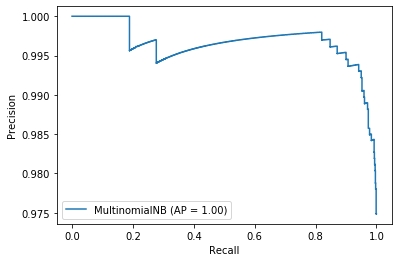

In [53]:
metrics.plot_precision_recall_curve(naive_model,X_test,y_test)